Compare with SAS and Python
==============


## DNN을 활용한 SAS & Python 비교
SAS VDMML과 Python의 Tensorflow의 deep learning 성능을 비교하고자 한다. 
본 코드는 Python의 Tensorflow 코드이며, Deep Neural Network를 대상으로 비교를 실시하였다.
SAS VDMML 코드는 아래 링크를 참조하면 된다.

1. [load data](https://github.com/beom-ss/deeplearning_SAS/blob/master/vdmml_code/DL_01_load_data.sas)

2. [03.DLNN](https://github.com/beom-ss/deeplearning_SAS/blob/master/vdmml_code/DL_03_DLNN.sas)

3. [04.batchDLNN](https://github.com/beom-ss/deeplearning_SAS/blob/master/vdmml_code/DL_04_batchDLNN.sas)

---- 
## Data Set
Data는 **develop** Data를 사용하였고 (train, validation, test set)으로 Target별 층화추출되어 있다.

| Variable | <center>Description</center>                     | Role     | Level    |
|----------|--------------------------------------------------|----------|----------|
| ATM      | Used ATM service (1=yes, 0=no)                   | Input    | Binary   |
| ATMAmt   | ATM withdrawal amount                            | Input    | Interval | 
| AcctAge  | Age of oldest account in years                   | Input    | Interval | 
| Age      | Age of customer in years                         | Input    | Interval | 
| Branch   | Branch of Bank (B1 – B19)                        | Rejected | Nominal  |
| CC       | Has credit card account (1=yes, 0=no)            | Input    | Binary   |
| CCBal    | Credit card balance                              | Input    | Interval | 
| CCPurc   | Number of credit card purchases                  | Input    | Interval | 
| CD       | Has certificate of deposit (1=yes, 0=no)         | Input    | Binary   |
| CDBal    | Certificate of deposit balance                   | Input    | Interval | 
| CRScore  | Credit score                                     | Input    | Interval | 
| CashBk   | Number of times customer received cash back      | Input    | Interval | 
| Checks   | Number of checks                                 | Input    | Interval | 
| DDA      | Checking account (1=yes, 0=no)                   | Input    | Binary   |
| DDABal   | Checking account balance                         | Input    | Interval | 
| Dep      | Number of checking deposits                      | Input    | Interval | 
| DepAmt   | Amount deposited                                 | Input    | Interval | 
| DirDep   | Direct deposit (1=yes, 0=no)                     | Input    | Binary   |
| HMOwn    | Owns home (1=yes, 0=no)                          | Input    | Binary   |
| HMVal    | Home value in thousands of dollars               | Input    | Interval | 
| ILS      | Has installment loan (1=yes, 0=no)               | Input    | Binary   |
| ILSBal   | Installment loan balance                         | Input    | Interval | 
| IRA      | Has retirement account (1=yes, 0=no)             | Input    | Binary   |
| IRABal   | Retirement account balance                       | Input    | Interval | 
| InArea   | Local address (1=yes, 0=no)                      | Input    | Binary   |
| Income   | Income in thousands of dollars                   | Input    | Interval | 
| Ins      | Purchase variable annuity account (1=yes, 0=no)  | Target   | Binary   |
| Inv      | Has investment account (1=yes, 0=no)             | Input    | Binary   |
| InvBal   | Investment account balance                       | Input    | Interval | 
| LOC      | Has line of credit (1=yes, 0=no)                 | Input    | Binary   |
| LOCBal   | Line of credit balance                           | Input    | Interval | 
| LORes    | Length of residence in years                     | Input    | Interval | 
| MM       | Has money market account (1=yes, 0=no)           | Input    | Binary   |
| MMBal    | Money market balance                             | Input    | Interval | 
| MMCred   | Number of money market credits                   | Input    | Interval | 
| MTG      | Has mortgage account (1=yes, 0=no)               | Input    | Binary   |
| MTGBal   | Mortgage balance                                 | Input    | Interval | 
| Moved    | Recent address change (1=yes, 0=no)              | Input    | Binary   |
| NSF      | Occurrence of insufficient funds (1=yes, 0=no)   | Input    | Binary   |
| NSFAmt   | Amount of insufficient funds                     | Input    | Interval | 
| POS      | Number of point of sale transactions             | Input    | Interval | 
| POSAmt   | Amount in point of sale transactions             | Input    | Interval | 
| Phone    | Number of times customer used telephone banking  | Input    | Interval | 
| Res      | Area classification (R=rural, S=suburb, U=urban) | Rejected | Nominal  |
| SDB      | Has a safety deposit box (1=yes, 0=no)           | Input    | Binary   |


## 개발 환경
    
- SAS VDMML : `SAS Viya 3.4`
- Python : `Python 3.6.8 :: conda 4.6.9`
    
    
    
-------
## Contents

1. [Setting environment for deep learning](#1.-Setting-environment-for-deep-learning)
2. [Load Data](#2.-Load-Data)
3. [Deep Learning Architecture](#3.-Deep-Learning-Architecture)
4. [Deep Learning Training](#4.-Deep-Learning-Training)
5. [Add Batch Normalization](#5.-Add-Batch-Normalization)
6. [Deep Learning Architecture using CLASS](#6.-Deep-Learning-Architecture-using-CLASS)

---

## 1. Setting environment for deep learning

In [9]:
# library import
import os
import time
import numpy as np
import scipy as sp
import pandas as pd

from IPython.display import clear_output

import tensorflow as tf
from tensorflow.keras import layers

%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# tensorflow 2.0 style로 코드를 작성하고자 할 때 사용(API를 제공)
# 2.0 style에서는 session으로 실행할 필요가 없음
tf.enable_eager_execution()
tf.__version__

'1.13.1'

## 2. Load Data

### 2.1. csv to pandas dataframe

In [11]:
path_base = os.getcwd()
path_base
# os.listdir(path_base)

'C:\\Users\\korbsl\\OneDrive - SAS\\Backup\\500_Practice\\20_Python\\1_Deep_learning\\VDMML_training'

In [12]:
file_path = 'C:\\Users\\korbsl\\OneDrive - SAS\Backup\\500_Practice\\10_SAS\\1_Deep_learning\\vdmml_data'

In [13]:
# pandas로 csv file 호출
train_develop = pd.read_csv(file_path+'\\train_develop.csv', sep=',', header=0)
valid_develop = pd.read_csv(file_path+'\\valid_develop.csv', sep=',', header=0)
test_develop  = pd.read_csv(file_path+'\\test_develop.csv', sep=',', header=0)

### 2.2. Check Data type

In [14]:
# train, valid, test set head 출력
pd.concat([train_develop.head(2)
        ,valid_develop.head(2)
        ,test_develop.head(2)], axis=0, keys=['train','valid','test'], names=['part','row'])

AcctAge  DDA   DDABal  CashBk  Checks  DirDep  NSF  NSFAmt  Phone  \
part  row                                                                      
train 0        0.7    1  1986.81       0       1       1    0    0.00      0   
      1        4.1    0     0.00       0       0       0    0    0.00      0   
valid 0        6.7    1  2813.45       0       2       0    0    0.00      0   
      1        0.8    1   190.03       0       1       0    1    5.65      0   
test  0        0.3    1   419.27       0       0       0    0    0.00      0   
      1        0.5    1  1594.84       0       1       0    0    0.00      0   

           Teller  ...  Moved  InArea  Ins  Branch  Res  Dep   DepAmt  Inv  \
part  row          ...                                                       
train 0         0  ...      0       1    0      B2    R    1   446.93    0   
      1         0  ...      0       1    1      B3    S    0     0.00    0   
valid 0         5  ...      0       1    1      B1    S    2  1208.94    0   
      1         0  ...      0       1    0     B14    S    3   880.25    0   
test  0         0  ...      0       1    1     B17    R    2  1170.06    0   
      1         1  ...      0       1    0      B1    S    1  1144.24    0   

           InvBal  _PartInd_  
part  row                     
train 0       0.0          1  
      1       0.0          1  
valid 0       0.0          2  
      1       0.0          2  
test  0       0.0          0  
      1       0.0          0  

[6 rows x 49 columns]

In [15]:
pd.DataFrame(train_develop.dtypes.to_dict().items(), columns=['variable', 'type'])

,variable,type
0,AcctAge,float64
1,DDA,int64
2,DDABal,float64
3,CashBk,int64
4,Checks,int64
5,DirDep,int64
6,NSF,int64
7,NSFAmt,float64
8,Phone,int64
9,Teller,int64


### 2.3. convert Data type

In [16]:
### data import code

def data_import(in_df):
    
#     path = 'C:\\beom\\_final_folder\\04_training\\01_VDMML\\1_deeplearning\\DL_VDMML_EXAM_DATA\\'
    path = file_path
    df = in_df
    
    # pandas로 csv file 호출
    df = pd.read_csv((path+'\\'+df+'.csv'), sep=',', header=0)

    # 변수 형태가 잘못 들어간 case 변경
    cat_vars = ['Branch','Res','Ins','DDA','DirDep','NSF','Sav','ATM','CD','IRA'
                    ,'LOC','ILS','MM','MTG','CC','SDB','HMOwn','Moved','InArea','Inv']
    for x in cat_vars:
        df[x] = df[x].astype(str)
    
    # 변수 유형별 리스트 셋 정의
    feature_list = [name for name in df.columns if (name !='Ins')&(name !='_PartInd_')]
    cat_vars = df.columns[(df.dtypes=='object')&(df.columns !='Ins')&(df.columns !='_PartInd_')]
    num_vars = [name for name in df.columns if (name not in cat_vars)&(name !='Ins')&(name !='_PartInd_')]

    # categorical data를 dummy로 변경
    x_dummy = pd.get_dummies(df[cat_vars], prefix_sep='_')
    y_dummy = pd.get_dummies(df['Ins'], prefix_sep='_', drop_first=True)
    
    # numeric variable standardization
    df[num_vars] = (df[num_vars] - np.mean(df[num_vars], axis=0)) / np.std(df[num_vars], axis=0)

    # 최종 X, Y data set 생성
    out_x = np.c_[df[num_vars].values, x_dummy.values].astype(np.float64)
    out_y = y_dummy.values.ravel().astype(np.float64)
#     out_y = y_dummy.values.ravel().astype(np.float64).reshape((-1,1))
    
    # 모든 변수 이름
    feature_names = num_vars + x_dummy.columns.tolist()
    
    return out_x, out_y, feature_names


(train_x, train_y, feature_names) = data_import(in_df='train_develop')
(valid_x, valid_y, _) = data_import(in_df='valid_develop')
(test_x, test_y, _) = data_import(in_df='test_develop')

In [17]:
# check data shape
((train_x.shape
, train_y.shape),
 (valid_x.shape
, valid_y.shape),
 (test_x.shape
, test_y.shape))

(((19358, 84), (19358,)), ((9679, 84), (9679,)), ((3227, 84), (3227,)))

## 3. Deep Learning Architecture

### 3.1. set up dataset with `tf.data`

In [18]:
# tensorflow 기본 hyperparameter설정
tf.set_random_seed(1234)
batch_size = 60
max_epochs = 10

# training set
# data와 label을 tupple 형태로 넣어줘야 함 tupple:()
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))

# random하게 train하기 위해 shuffle을 진행 (buffer_size는 크게 잡는다.)
train_dataset = train_dataset.shuffle(buffer_size=10000, seed=1234)

# batch size 설정
train_dataset = train_dataset.batch(batch_size)

print(train_dataset)

# validation set
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))
valid_dataset = valid_dataset.shuffle(buffer_size=10000, seed=1234)
valid_dataset = valid_dataset.batch(batch_size)
print(valid_dataset)

# test set
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_dataset = test_dataset.shuffle(buffer_size=10000, seed=1234)
test_dataset = test_dataset.batch(batch_size)
print(test_dataset)

<DatasetV1Adapter shapes: ((?, 84), (?,)), types: (tf.float64, tf.float64)>
<DatasetV1Adapter shapes: ((?, 84), (?,)), types: (tf.float64, tf.float64)>
<DatasetV1Adapter shapes: ((?, 84), (?,)), types: (tf.float64, tf.float64)>


### 3.2. Create Model (Sequential Model)

In [19]:
# create sequential model
seq_model = tf.keras.Sequential([
    layers.Dropout(rate=0.2),
    
    layers.Dense(30, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(20, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(10, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(5 , kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(10, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(20, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(30, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(1, activation='sigmoid')
])



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [20]:
for df, labels in train_dataset.take(2):
  print("Predictions: ", seq_model(df[0:1]).numpy())
  predictions = seq_model(df, training=True)

Instructions for updating:
Colocations handled automatically by placer.
Predictions:  [[0.49565205]]
Predictions:  [[0.4964349]]


In [21]:
for var in seq_model.variables:
    print(var.shape)

(84, 30)
(30,)
(30, 20)
(20,)
(20, 10)
(10,)
(10, 5)
(5,)
(5, 10)
(10,)
(10, 20)
(20,)
(20, 30)
(30,)
(30, 1)
(1,)


In [22]:
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2550      
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  620       
_________________________________________________________________
re_lu_1 (ReLU)               multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
__________

## 4. Deep Learning Training

### Training Pseudo Code

```python
for epoch in max_epochs: # 1 epoch: 모든 데이터(N)를 한번 학습 시켰을 때
  for step in num_batches: # num_batches = int(data_size / batch_size)
    1. sampling mini-batches with batch_size
      1-1. data augmentation [if you need (actually always)]
    2. calculate the predictions # predictions = f(x)
    3. calculate the loss # loss = loss(labels, predictions)
    4. calculate the gradient with respect to weights
    5. update weights
```

### 4.1. DL Training

In [23]:
# use Adam optimizer
optimizer = tf.train.AdamOptimizer()
#optimizer = tf.keras.optimizers.SGD(0.5)

# save loss history for plot
cross_entropy_history = []
l1_l2_loss_history = []
total_loss_history = []

In [53]:
global_step = tf.train.get_or_create_global_step()
for epoch in range(max_epochs):
    for (step, (df, labels)) in enumerate(train_dataset):
        start_time = time.time()
        with tf.GradientTape() as tape:
            predictions = tf.reshape(seq_model(df, training=True), shape=[-1,])
            
            # l1 l2를 추가한 경우 loss에도 추가를 해야 함
            cross_entropy = tf.losses.sigmoid_cross_entropy(labels, predictions)
            l1_l2_loss = tf.reduce_sum(seq_model.losses)
            total_loss = cross_entropy + l1_l2_loss
            
        grads = tape.gradient(total_loss, seq_model.variables)
        optimizer.apply_gradients(zip(grads, seq_model.variables), global_step=global_step)
        
        cross_entropy_history.append(cross_entropy.numpy())
        l1_l2_loss_history.append(l1_l2_loss.numpy())
        total_loss_history.append(total_loss.numpy())
        
        if global_step.numpy() % 10 == 0:
            clear_output(wait=True)
            duration = time.time() - start_time
            examples_per_sec = batch_size / float(duration)
            epochs = epoch + step * batch_size / float(len(train_x))
            print("epochs: {:.2f}, step: {}, loss: {:g}, ({:.2f} examples/sec; {:.3f} sec/batch)".format(epochs, global_step.numpy(), total_loss, examples_per_sec, duration))

print("training done!")

epochs: 10.00, step: 12920, loss: 0.694238, (2601.68 examples/sec; 0.023 sec/batch)
training done!


### 4.2. Loss function Plot

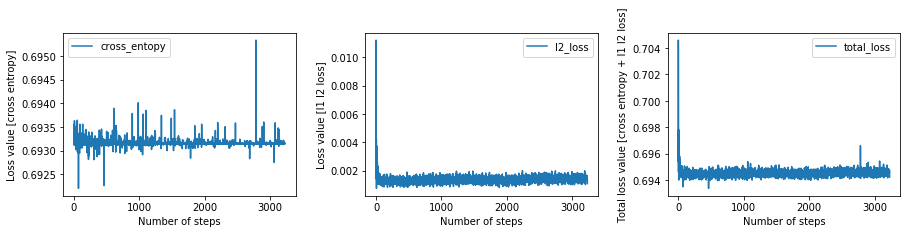

In [58]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("cross_entropy")
plt.plot(cross_entropy_history, label='cross_entopy')
plt.xlabel('Number of steps')
plt.ylabel('Loss value [cross entropy]')
plt.legend()

plt.subplot(1, 3, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("l1_l2_loss")
plt.plot(l1_l2_loss_history, label='l1 l2_loss')
plt.xlabel('Number of steps')
plt.ylabel('Loss value [l1 l2 loss]')
plt.legend()

plt.subplot(1, 3, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("total_loss")
plt.plot(total_loss_history, label='total_loss')
plt.xlabel('Number of steps')
plt.ylabel('Total loss value [cross entropy + l1 l2 loss]')
plt.legend()

plt.show()

### 4.3. Evaluate a model

In [62]:
accuracy = tf.keras.metrics.Accuracy()

for df, labels in test_dataset:
    predictions = seq_model(df, training=False)
    accuracy(labels, tf.argmax(predictions, axis=1))
    
print("test accuracy: {:.3f}".format(accuracy.result()))

test accuracy: 0.654


## 5. Add Batch Normalization

### 5.1. Renewal DL Architecture

In [63]:
# create sequential model
bn_model = tf.keras.Sequential([
    layers.Dropout(rate=0.2),
    
    layers.Dense(30, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(20, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(10, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(5 , kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(10, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(20, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(30, kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.003, l2=0.002)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(1, activation='sigmoid')
])
layers.

In [65]:
for df, labels in train_dataset.take(2):
    print("Predictions: ", bn_model(df[0:1]).numpy())
    predictions = seq_model(df, training=True)

Predictions:  [[0.54391305]]
Predictions:  [[0.56964179]]


In [66]:
bn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  2550      
_________________________________________________________________
batch_normalization_v1 (Batc multiple                  120       
_________________________________________________________________
re_lu_7 (ReLU)               multiple                  0         
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  620       
_________________________________________________________________
batch_normalization_v1_1 (Ba multiple                  80        
__________

### 5.2. Re-Training

In [67]:
# use Adam optimizer
optimizer = tf.train.AdamOptimizer()
#optimizer = tf.keras.optimizers.SGD(0.5)

# save loss history for plot
cross_entropy_history = []
l1_l2_loss_history = []
total_loss_history = []

In [68]:
global_step = tf.train.get_or_create_global_step()
for epoch in range(max_epochs):
    for (step, (df, labels)) in enumerate(train_dataset):
        start_time = time.time()
        with tf.GradientTape() as tape:
            predictions = tf.reshape(bn_model(df, training=True), shape=[-1,])
            
            # l1 l2를 추가한 경우 loss에도 추가를 해야 함
            cross_entropy = tf.losses.sigmoid_cross_entropy(labels, predictions)
            l1_l2_loss = tf.reduce_sum(bn_model.losses)
            total_loss = cross_entropy + l1_l2_loss
            
        grads = tape.gradient(total_loss, bn_model.variables)
        optimizer.apply_gradients(zip(grads, bn_model.variables), global_step=global_step)
        
        cross_entropy_history.append(cross_entropy.numpy())
        l1_l2_loss_history.append(l1_l2_loss.numpy())
        total_loss_history.append(total_loss.numpy())
        
        if global_step.numpy() % 10 == 0:
            clear_output(wait=True)
            duration = time.time() - start_time
            examples_per_sec = batch_size / float(duration)
            epochs = epoch + step * batch_size / float(len(train_x))
            print("epochs: {:.2f}, step: {}, loss: {:g}, ({:.2f} examples/sec; {:.3f} sec/batch)".format(epochs, global_step.numpy(), total_loss, examples_per_sec, duration))

print("training done!")

epochs: 10.00, step: 16150, loss: 0.694363, (973.56 examples/sec; 0.062 sec/batch)
training done!


### 5.3. Batch-Norm loss plot

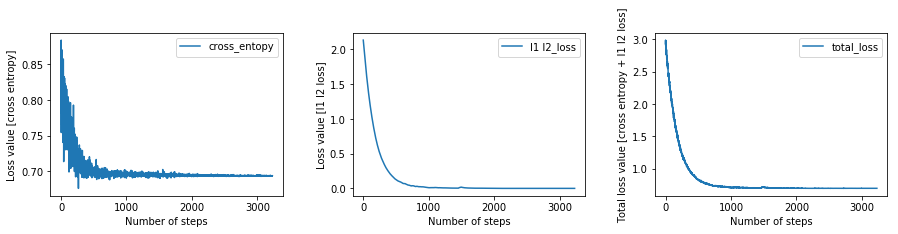

In [70]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("cross_entropy")
plt.plot(cross_entropy_history, label='cross_entopy')
plt.xlabel('Number of steps')
plt.ylabel('Loss value [cross entropy]')
plt.legend()

plt.subplot(1, 3, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("l1_l2_loss")
plt.plot(l1_l2_loss_history, label='l1 l2_loss')
plt.xlabel('Number of steps')
plt.ylabel('Loss value [l1 l2 loss]')
plt.legend()

plt.subplot(1, 3, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("total_loss")
plt.plot(total_loss_history, label='total_loss')
plt.xlabel('Number of steps')
plt.ylabel('Total loss value [cross entropy + l1 l2 loss]')
plt.legend()

plt.show()

### 5.4. Evaluate a batch-norm model

In [71]:
accuracy = tf.keras.metrics.Accuracy()

for df, labels in test_dataset:
    predictions = bn_model(df, training=False)
    accuracy(labels, tf.argmax(predictions, axis=1))
    
print("test accuracy: {:.3f}".format(accuracy.result()))

test accuracy: 0.654


## 6. Deep Learning Architecture using CLASS

### 6.1. Build Class Model

In [81]:
class class_model(tf.keras.Model):
    def __init__(self):
        super(class_model, self).__init__() # 부모 class를 받아서 initialize한다
        
        self.l1_decay = 0.003
        self.l2_decay = 0.002
        
        self.input_drp  = layers.Dropout(rate=0.2)
        
        self.dense1     = layers.Dense(20, kernel_initializer=tf.contrib.layers.xavier_initializer()
                                      , kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_decay, l2=self.l2_decay))
        self.dense1_bn  = layers.BatchNormalization()
        self.dense1_act = layers.ReLU()
        self.dense1_drp = layers.Dropout(rate=0.5)
        
        self.dense2     = layers.Dense(20, kernel_initializer=tf.contrib.layers.xavier_initializer()
                                      , kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_decay, l2=self.l2_decay))
        self.dense2_bn  = layers.BatchNormalization()
        self.dense2_act = layers.ReLU()
        self.dense2_drp = layers.Dropout(rate=0.5)
        
        self.dense3     = layers.Dense(10, kernel_initializer=tf.contrib.layers.xavier_initializer()
                                      , kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_decay, l2=self.l2_decay))
        self.dense3_bn  = layers.BatchNormalization()
        self.dense3_act = layers.ReLU()
        self.dense3_drp = layers.Dropout(rate=0.5)
        
        self.logits     = layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs, training=True):
        
        inputs_  = self.input_drp(inputs)
        
        dense1_ = self.dense1(inputs_)
        dense1_ = self.dense1_bn(dense1_, training=training)
        dense1_ = self.dense1_act(dense1_)
        dense1_ = self.dense1_drp(dense1_)
        
        dense2_ = self.dense2(dense1_)
        dense2_ = self.dense2_bn(dense2_, training=training)
        dense2_ = self.dense2_act(dense2_)
        dense2_ = self.dense2_drp(dense2_)
        
        dense3_ = self.dense3(dense2_)
        dense3_ = self.dense3_bn(dense3_, training=training)
        dense3_ = self.dense3_act(dense3_)
        dense3_ = self.dense3_drp(dense3_)
        
        logits_ = self.logits(dense3_)
        
        return logits_


In [82]:
model = class_model()

In [84]:
for images, labels in train_dataset.take(1):
    print("Logits: ", model(images).shape, tf.reshape(labels, shape=[-1,1]).shape)

Logits:  (60, 1) (60, 1)


In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_20 (Dropout)         multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  1700      
_________________________________________________________________
batch_normalization_v1_10 (B multiple                  80        
_________________________________________________________________
re_lu_17 (ReLU)              multiple                  0         
_________________________________________________________________
dropout_21 (Dropout)         multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  420       
_________________________________________________________________
batch_normalization_v1_11 (B multiple                  80        
__________

### 6.2. Training Class Model

In [86]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)

cross_entropy_history = []
l1_l2_loss_history = []
total_loss_history = []

In [77]:
global_step = tf.train.get_or_create_global_step()
for epoch in range(max_epochs):
    for (step, (df, labels)) in enumerate(train_dataset):
        start_time = time.time()
        
        # calculate the predictions and loss
        with tf.GradientTape() as tape:
            logits = tf.reshape(model(df), shape=[-1,])
            cross_entropy = tf.losses.sigmoid_cross_entropy(labels, logits)
            l1_l2_loss = tf.reduce_sum(model.losses)
            total_loss = cross_entropy + l1_l2_loss
        
        # create loss history table 
        cross_entropy_history.append(cross_entropy.numpy())
        l1_l2_loss_history.append(l1_l2_loss.numpy())
        total_loss_history.append(total_loss.numpy())
        
        # weight optimization
        grads = tape.gradient(total_loss, model.variables)
        optimizer.apply_gradients(zip(grads, model.variables), global_step=global_step)
        
        if global_step.numpy() % 10 == 0:
            clear_output(wait=True)
            duration = time.time() - start_time
            examples_per_sec = batch_size / float(duration)
            epochs = epoch + step * batch_size / float(len(train_x))
            print("epochs: {:.2f}, step: {}, loss: {:g}, ({:.2f} examples/sec; {:.3f} sec/batch)".format(epochs, global_step.numpy(), total_loss, examples_per_sec, duration))
        
print("training done")

epochs: 60.07, step: 19380, loss: 0.693908, (2258.12 examples/sec: 0.027 sec/batch)
training done


### 6.3. Loss function Plot

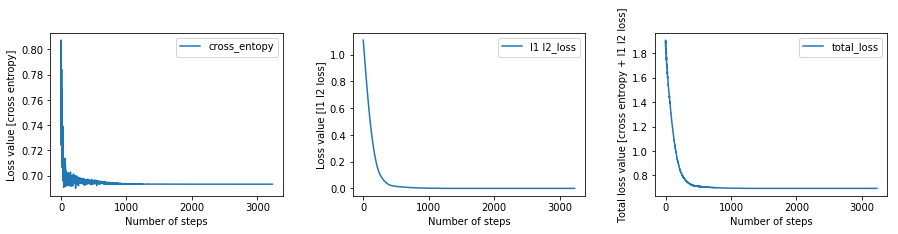

In [78]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("cross_entropy")
plt.plot(cross_entropy_history, label='cross_entopy')
plt.xlabel('Number of steps')
plt.ylabel('Loss value [cross entropy]')
plt.legend()

plt.subplot(1, 3, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("l1_l2_loss")
plt.plot(l1_l2_loss_history, label='l1 l2_loss')
plt.xlabel('Number of steps')
plt.ylabel('Loss value [l1 l2 loss]')
plt.legend()

plt.subplot(1, 3, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#plt.set_title("total_loss")
plt.plot(total_loss_history, label='total_loss')
plt.xlabel('Number of steps')
plt.ylabel('Total loss value [cross entropy + l1 l2 loss]')
plt.legend()

plt.show()

### 6.4. Evaluate Class Model

In [87]:
accuracy = tf.keras.metrics.Accuracy()

for df, labels in test_dataset:
    predictions = model(df, training=False)
    accuracy(labels, tf.argmax(predictions, axis=1))
    
print("test accuracy: {:.3f}".format(accuracy.result()))

test accuracy: 0.654
